## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Loading the data

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE (1).csv",header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Data Cleaning

In [4]:
#removing unnecessary rows
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)

In [5]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.drop('index',axis=1,inplace=True)

In [7]:
#adding new feature,named 'Region' and assigning their region(look in the orginal data) in the dataset
df.loc[:122,'region']='bejaia'
df.loc[122:,'region']='Sidi-Bel Abbes'

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [9]:
df['Classes'] = df['Classes  '].str.strip() #to remove the leading and trailing whitespaces

In [10]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [11]:
df['Classes'].dtype

dtype('O')

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia,not fire


In [13]:
df.drop(['Classes  '],axis=1,inplace=True)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia,not fire


In [15]:
#printing the datatype of columns
for i in df.columns:
    print(df[i].dtype)

object
object
object
object
object
object
object
object
object
object
object
object
object
object
object


In [16]:
print(df.dtypes)

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
region         object
Classes        object
dtype: object


In [17]:
int_col = ['day', 'month', 'year', 'Temperature', ' RH']
float_col = [' Ws', 'Rain ', 'FFMC','DMC', 'ISI', 'BUI']

In [18]:
for i in int_col:
    df[i]=df[i].astype(int)
    print(i,df[i].dtype)

day int32
month int32
year int32
Temperature int32
 RH int32


In [19]:
for i in float_col:
    df[i]=df[i].astype(float)
    print(i,df[i].dtype)

 Ws float64
Rain  float64
FFMC float64
DMC float64
ISI float64
BUI float64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4    RH          244 non-null    int32  
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  region       244 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


In [21]:
#adding new feature, named "Date" by replacing unnecessary feature like 'day','month','year'
df['date'] = pd.to_datetime(df[['day','month','year']]) # the double brackets are used to create a DataFrame containing only the specified columns
df.drop(['day','month','year'],axis=1,inplace=True)

In [22]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,not fire,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,bejaia,not fire,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,not fire,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,bejaia,not fire,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,bejaia,not fire,2012-06-05


## Data Exploration

In [23]:
df.shape

(244, 13)

In [24]:
df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'region', 'Classes', 'date'],
      dtype='object')

In [25]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
Classes        1
date           0
dtype: int64

In [26]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [27]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,0.0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,bejaia,0.0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,0.0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,bejaia,0.0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,bejaia,0.0,2012-06-05


In [28]:
df['Classes'].mode()[0]
##[0]: This is used to get the first value in the mode result. 
#If there is only one mode, it will return that mode. If there are multiple modes,
#it will return the first mode in the list.

1.0

In [29]:
df['Classes'].fillna(df['Classes'].mode()[0],inplace=True) #axis parameter is not applicable

In [30]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
Classes        0
date           0
dtype: int64

In [31]:
df['Classes'].unique()

array([0., 1.])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1    RH          244 non-null    int32         
 2    Ws          244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  region       244 non-null    object        
 11  Classes      244 non-null    float64       
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [33]:
df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'region', 'Classes', 'date'],
      dtype='object')

In [34]:
numerical_feature =['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']

In [42]:
len(numerical_feature)

10

In [35]:
categorical_feature=['DC','FWI', 'region']

In [36]:
df['DC'] = df['DC'].str.replace(' ', '')

In [37]:
df['DC'].dtype

dtype('O')

In [39]:
#df.var() will have to convert the datatype to numeric

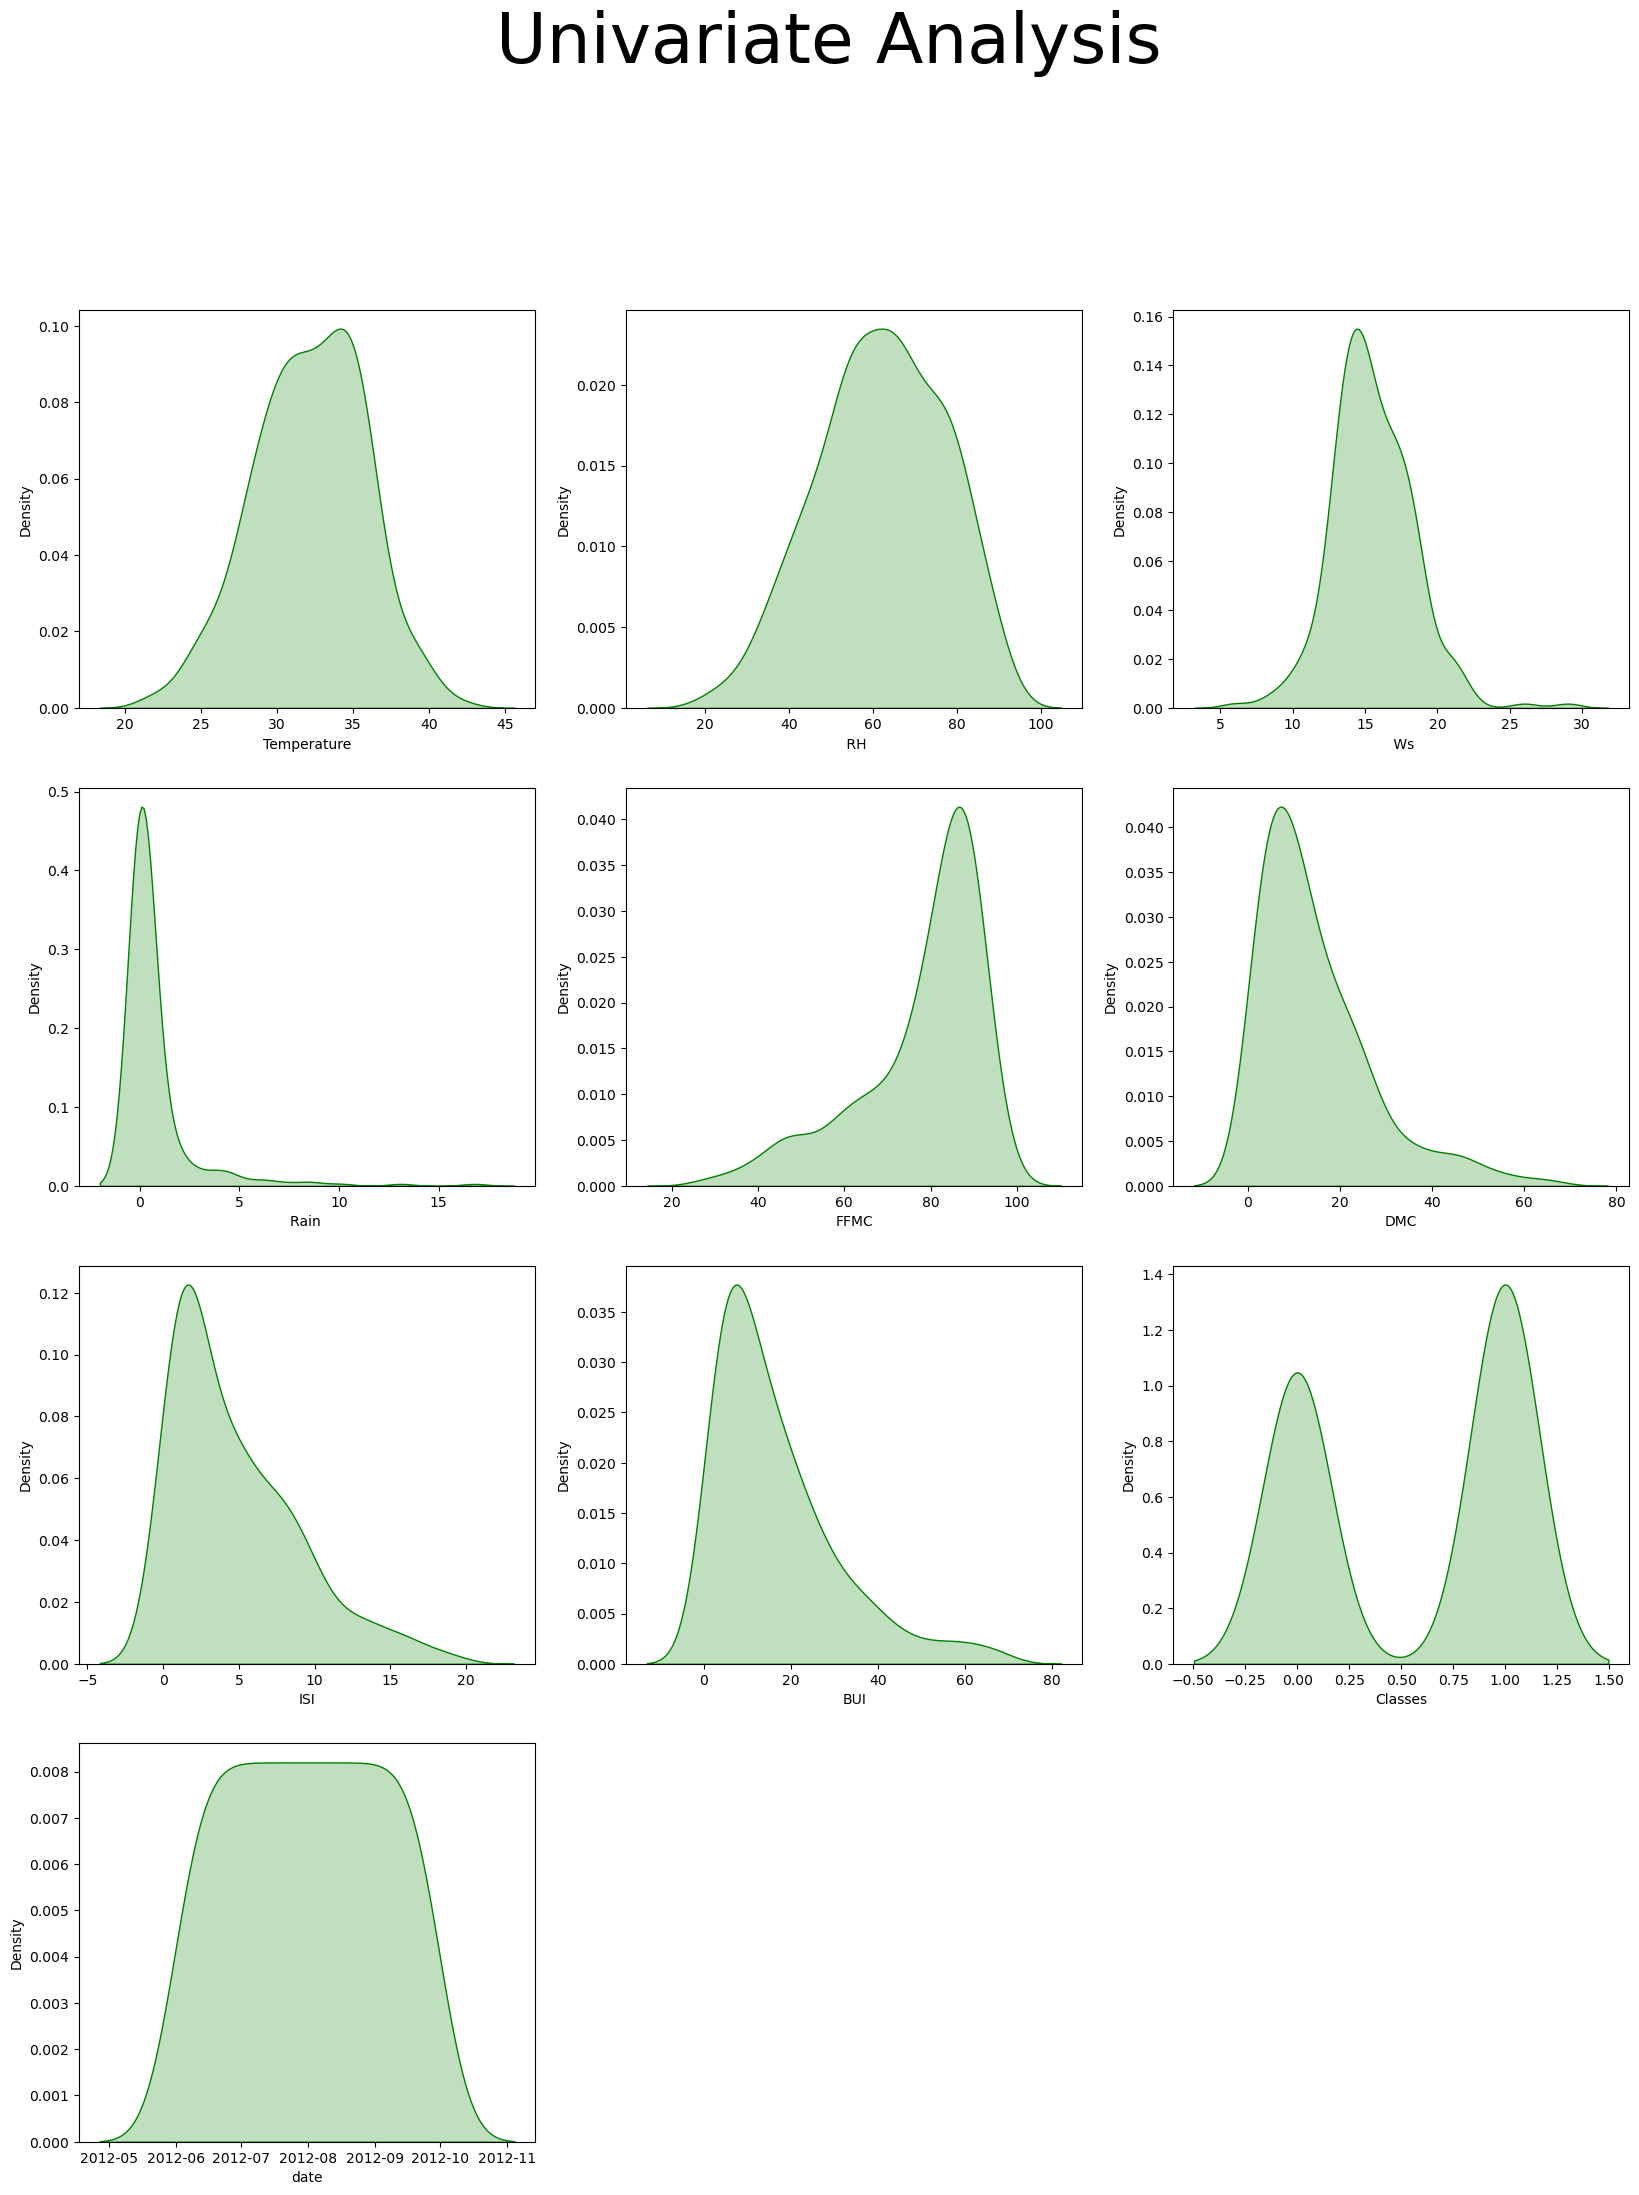

In [52]:
plt.figure(figsize=(20,30))
plt.suptitle("Univariate Analysis",fontsize=50)
#enumerate(num_col) returns pairs of (index, value) for each element in the num_col list.
for i,features in enumerate(numerical_feature):        #i is the index of the current element in num_col.features is the value (column name) of the current numerical feature in the iteration.
    plt.subplot(5,3,i+1)  #any values whose product is greater than equal to 10
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='g')
    #kde - kernel density estimate (KDE) plot

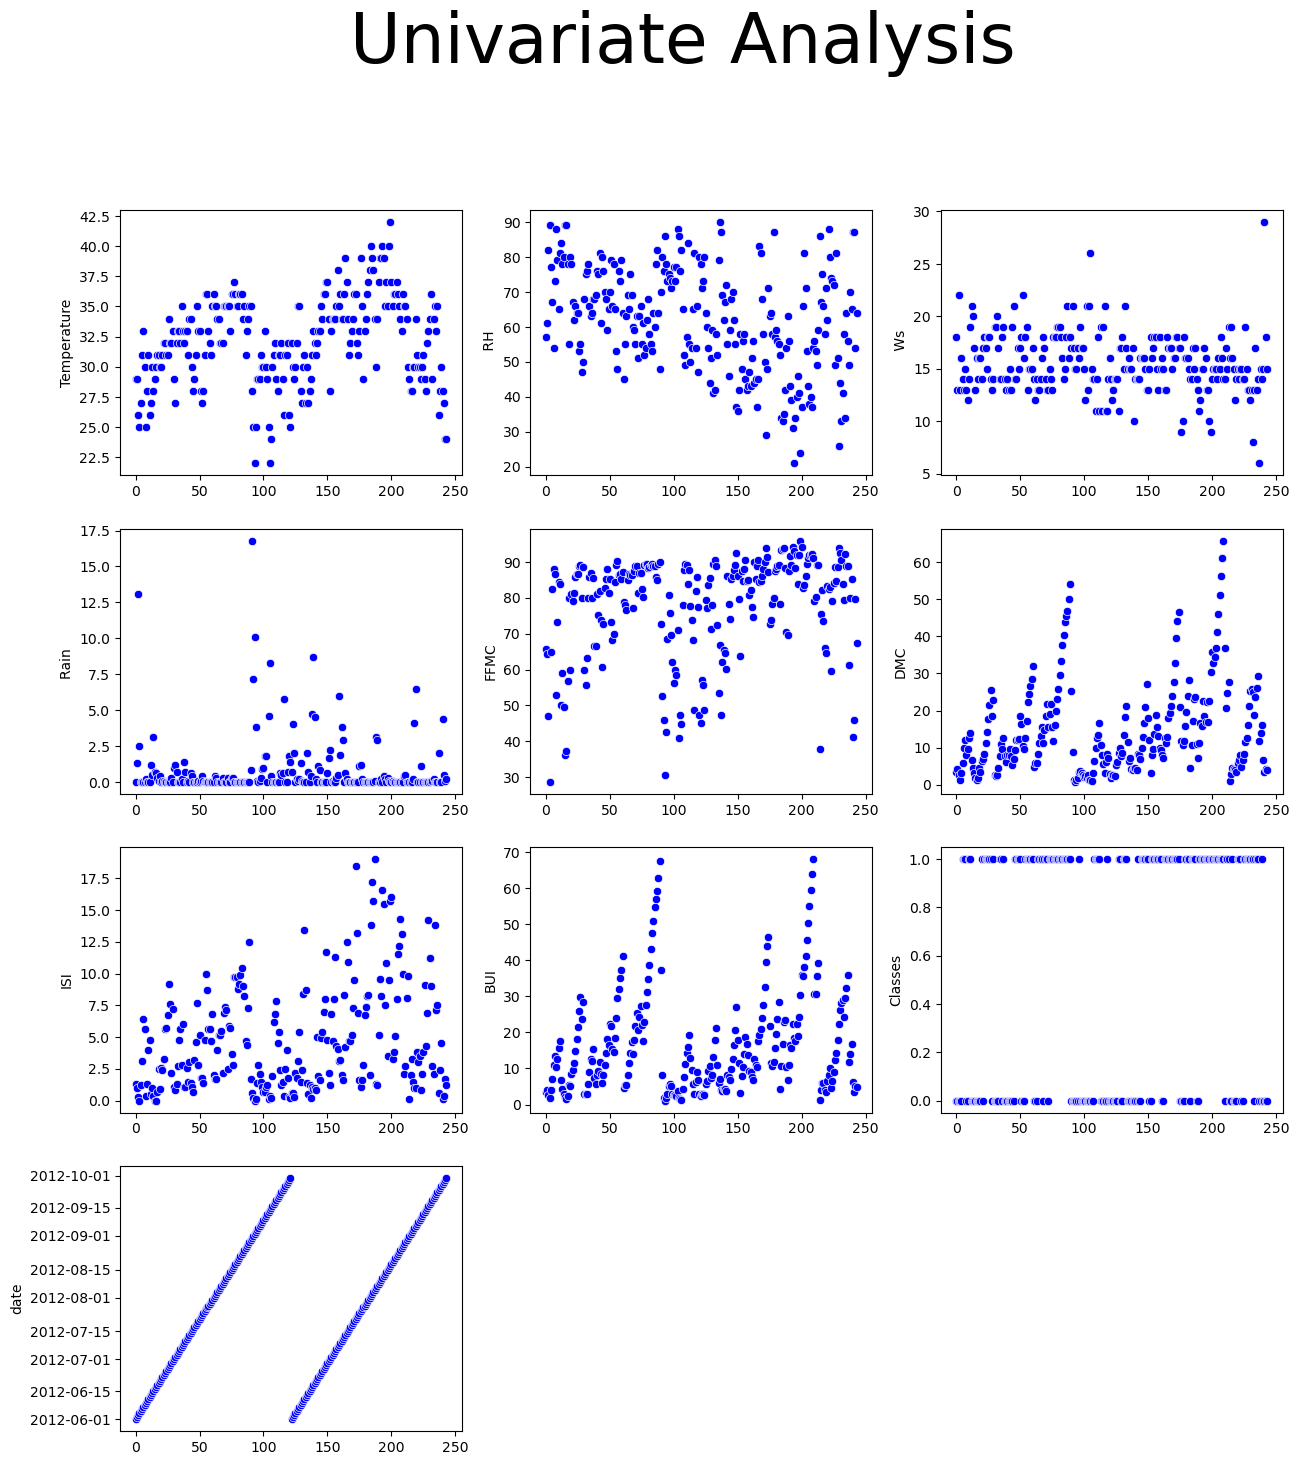

In [60]:
plt.figure(figsize=(15,20))
plt.suptitle("Univariate Analysis",fontsize=50)
#enumerate(num_col) returns pairs of (index, value) for each element in the num_col list.
for i,features in enumerate(numerical_feature):        #i is the index of the current element in num_col.features is the value (column name) of the current numerical feature in the iteration.
    plt.subplot(5,3,i+1)  #any values whose product is greater than equal to 10
    sns.scatterplot(x=df.index,y=df[numerical_feature[i]],color='blue',data=df)

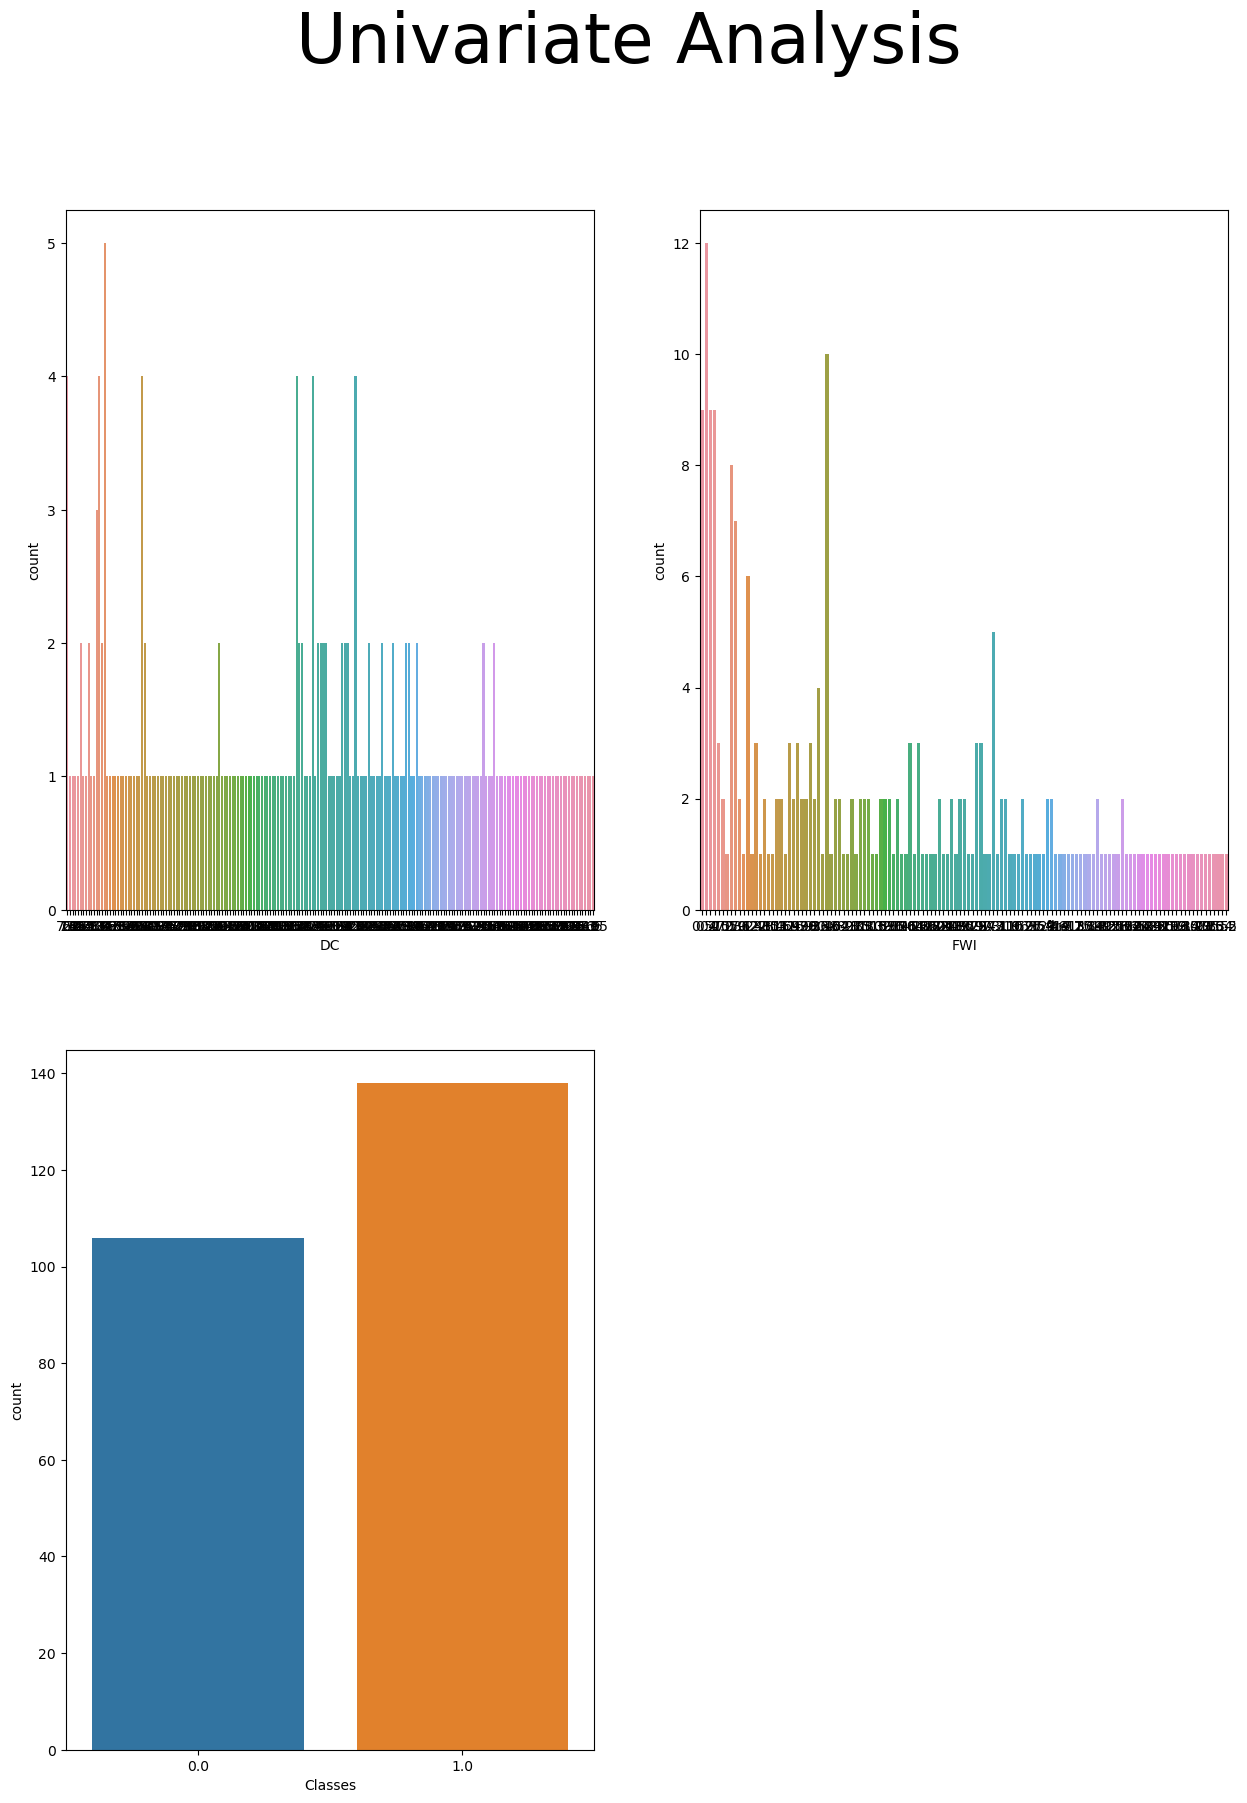

In [63]:
plt.figure(figsize=(15,20))
plt.suptitle("Univariate Analysis",fontsize=50)
cate1=['DC','FWI', 'Classes']
#enumerate(num_col) returns pairs of (index, value) for each element in the num_col list.
for i in range(0,len(cate1)):        #i is the index of the current element in num_col.features is the value (column name) of the current numerical feature in the iteration.
    plt.subplot(2,2,i+1)  #any values whose product is greater than equal to 10
    sns.countplot(x=df[cate1[i]])

In [65]:
#df.corr()